In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Regression loss  
* MSE
* MAE
* Huber loss
* Los cosh loss
* Quantile loss

#### Mean Square Error (MSE/ L2 Loss)
$ MSE = \sum\limits_{i=1}^n  {(y_i - y_i^p)}^2 $  

In [4]:
def mse(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean square error loss
    """
    
    return np.sum((true - pred)**2)

In [6]:
target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

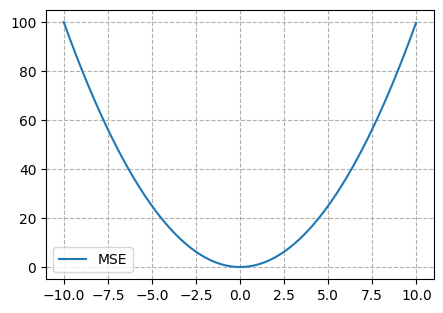

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3.5))
plt.plot(pred, (target - pred)**2, label='MSE')
plt.legend()
plt.grid(linestyle='--')
plt.show()

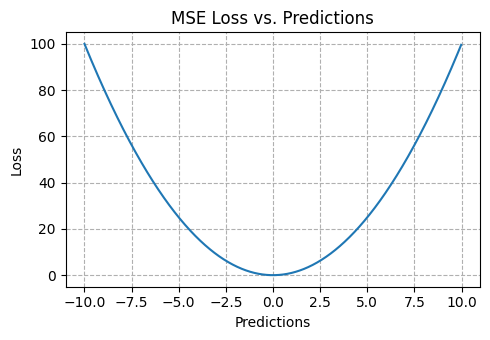

In [13]:
fig, ax1 = plt.subplots(1,1,figsize=(5, 3.5))

# array of same target value 10000 times
# target = np.repeat(100, 10000) 
# pred = np.arange(-10000,10000, 2)
target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)
loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]

# plot 
ax1.plot(pred, loss_mse)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MSE Loss vs. Predictions")
plt.grid(linestyle='--')
fig.tight_layout()

#### Mean Absolute Error (MAE/ L1 loss)
$ MAE = \sum\limits_{i=1}^n  {|y_i - y_i^p|} $  

In [14]:
def mae(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean absolute error loss
    """
    
    return np.sum(np.abs(true - pred))

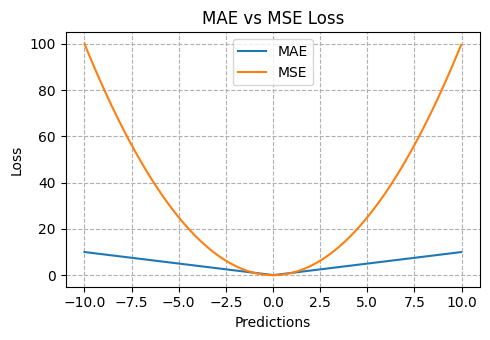

In [15]:
fig, ax1 = plt.subplots(1, 1,  figsize=(5, 3.5))

# array of same target value 10000 times
# target = np.repeat(100, 10000)
# pred = np.arange(-10000,10000, 2)

loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]

# plot
ax1.plot(pred, loss_mae, label="MAE")
ax1.plot(pred, loss_mse, label='MSE')
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MAE vs MSE Loss")
# ax1.set_title("MAE Loss vs. Predictions")

plt.grid(linestyle='--')
plt.legend()
fig.tight_layout()

In [41]:
loss_mae = mae(target, pred), mae(target, np.repeat(np.median(target), len(
    target))), mae(target, np.repeat(np.mean(target), len(target)))
loss_mse = mse(target, pred), mse(target, np.repeat(np.median(target), len(
    target))), mse(target, np.repeat(np.mean(target), len(target)))
print(loss_mae, loss_mse)

(4999.999999999894, 0.0, 0.0) (33333.39999999858, 0.0, 0.0)


#### Huber

In [36]:
def sm_mae(true, pred, delta):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: smoothed mean absolute error loss
    """
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

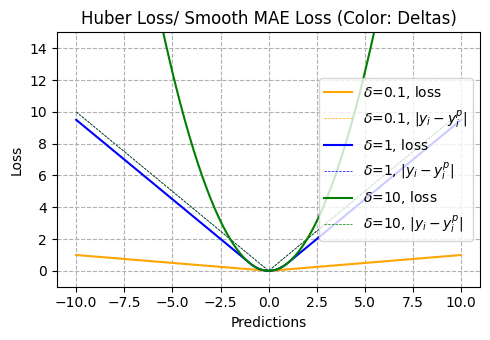

In [37]:
fig, ax1 = plt.subplots(1,1,   figsize=(5, 3.5))

# target = np.repeat(0, 1000) 
# pred = np.arange(-10,10, 0.02)

delta = [0.1, 1, 10]

losses_huber = [[[sm_mae(target[i], pred[i], q), np.abs(target[i]- pred[i])] for i in range(len(pred))] for q in delta]
losses_huber = np.array(losses_huber)
# plot 
c = ['orange', 'b', 'g']
for i in range(len(delta)):
    ax1.plot(pred, losses_huber[i][:, 0], label = '{}={}, loss'.format(r'$\delta$', delta[i]) , c=c[i])
    ax1.plot(pred, losses_huber[i][:, 1], label = '{}={}, {}'.format( r'$\delta$', delta[i], r'$|y_i - y_i^p|$'),   linestyle='--', lw=0.5, c=c[i])
    
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Huber Loss/ Smooth MAE Loss (Color: Deltas)")
ax1.legend()
ax1.set_ylim(bottom=-1, top = 15)
plt.grid(linestyle='--')
plt.legend(loc='right')
fig.tight_layout()

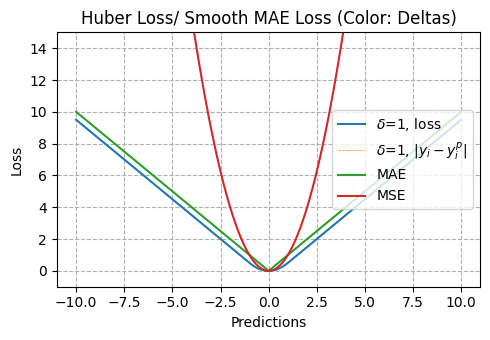

In [329]:
fig, ax1 = plt.subplots(1,1,   figsize=(5, 3.5))

# target = np.repeat(0, 1000) 
# pred = np.arange(-10,10, 0.02)

# delta = [0.1, 1, 10]
delta = [1]

losses_huber = [[[sm_mae(target[i], pred[i], q), np.abs(target[i]- pred[i])] for i in range(len(pred))] for q in delta]
losses_huber = np.array(losses_huber)
# plot 
# c = ['orange', 'b', 'g']
for i in range(len(delta)):
    ax1.plot(pred, losses_huber[i][:, 0], label = '{}={}, loss'.format(r'$\delta$', delta[i]) ,)# c=c[i])
    ax1.plot(pred, losses_huber[i][:, 1], label = '{}={}, {}'.format( r'$\delta$', delta[i], r'$|y_i - y_i^p|$'),   linestyle='--', lw=0.5,)# c=c[i])
ax1.plot(pred, loss_mae, label="MAE")
ax1.plot(pred, loss_mse, label='MSE')

ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Huber Loss/ Smooth MAE Loss (Color: Deltas)")
ax1.legend()
ax1.set_ylim(bottom=-1, top = 15)
plt.grid(linestyle='--')
plt.legend(loc='right')
fig.tight_layout()

#### Log cosh loss
$ L(y, y^p) = \sum\limits_{i=1}^n  {\log(\cosh(y_i^p-y_i))} $  

In [43]:
def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return loss#np.sum(loss)

100000 100000


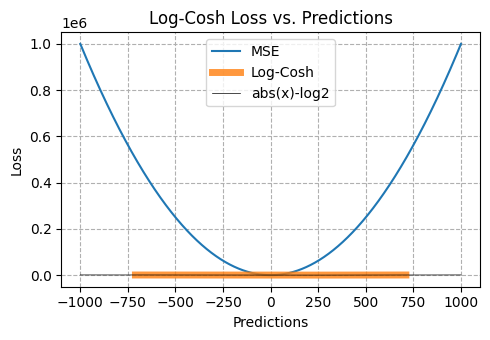

In [51]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3.5))

target = np.repeat(0, 100000)
pred = np.arange(-1000, 1000, 0.02)
print(len(target), len(pred))

loss_logcosh = [logcosh(target[i], pred[i]) for i in range(len(pred))]
loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]

# loss_cosh = [np.log(np.cosh(x)) for x in pred-target]
absx = [abs(x)-np.log(2) for x in pred-target]

# plot

ax1.plot(pred, loss_mse, label='MSE')
ax1.plot(pred, loss_logcosh, label='Log-Cosh',  lw=5, alpha=0.8,)
# ax1.plot(pred, loss_cosh, label='cosh_', lw=5, alpha=0.5)
ax1.plot(pred, absx, label='abs(x)-log2',c='k', lw=0.5)

ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Log-Cosh Loss vs. Predictions")
plt.legend()
plt.grid(linestyle='--')
fig.tight_layout()

In [53]:
loss_logcosh[:750]

[inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf

In [50]:
# loss_logcosh
np.log(2)

0.6931471805599453

#### Quantile loss

 $ L_\gamma(y, y^p) = \sum\limits_{i=y_i<y_i^p}  ({\gamma-1}).|y_i - y_i^p| + \sum\limits_{i=y_i\geq y_i^p}  ({\gamma}).|y_i - y_i^p|  $  

In [147]:
def quan(true, pred, theta):
    loss = np.where(true >= pred, theta*(np.abs(true-pred)), (1-theta)*(np.abs(true-pred)))
    return np.sum(loss)

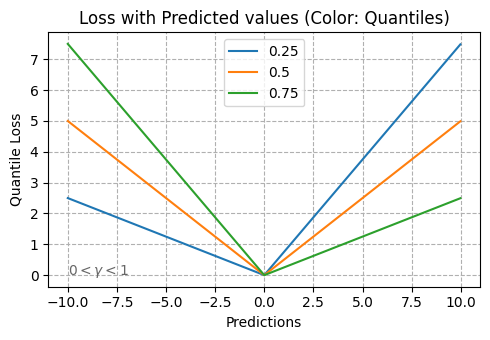

In [168]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3.5))

target = np.repeat(0, 1000)
pred = np.arange(-10, 10, 0.02)

quantiles = [0.25, 0.5, 0.75]

losses_quan = [[quan(target[i], pred[i], q)
                for i in range(len(pred))] for q in quantiles]

# plot
for i in range(len(quantiles)):
    ax1.plot(pred, losses_quan[i], label=quantiles[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Quantile Loss')
ax1.set_title("Loss with Predicted values (Color: Quantiles)")

ax1.text(-10, 0, r'$0<\gamma<1$', fontsize=10,c='#666666')
ax1.legend()
plt.grid(linestyle='--')

fig.tight_layout()

#### **All regression losses in single plot**

NameError: name 'quan' is not defined

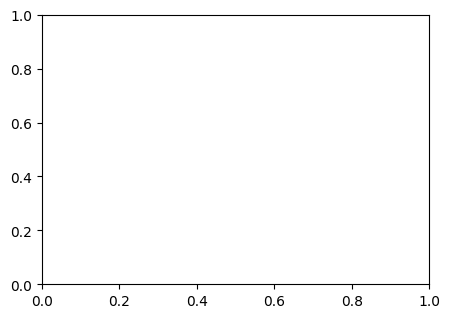

In [165]:
fig, ax1 = plt.subplots(1,1,  figsize=(5, 3.5))

target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

# calculating loss function for all predictions. 
loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]
loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]

loss_sm_mae1 = [sm_mae(target[i], pred[i], 5) for i in range(len(pred))]
loss_sm_mae2 = [sm_mae(target[i], pred[i], 10) for i in range(len(pred))]

loss_logcosh = [logcosh(target[i], pred[i]) for i in range(len(pred))]
loss_quan1 = [quan(target[i], pred[i], 0.25) for i in range(len(pred))]

loss_hinge = [hinge(target[i], pred[i]) for i in range(len(pred))]
losses_focal = [focal(target[i], pred[i], 5) for i in range(len(pred))]
loss_exp = [expo(target[i], pred[i]) for i in range(len(pred))]



losses = [loss_mse, loss_mae, loss_sm_mae1, loss_sm_mae2, loss_logcosh, loss_quan1, loss_hinge, losses_focal, loss_exp]
names = ['MSE', 'MAE','Huber (5)', 'Huber (10)', 'Log-cosh', 'Quantile (0.25)', 'hinge', 'focal(5)', 'exp']


# cmap = ['#d53e4f',
# '#fc8d59',
# '#fee08b',
# '#e6f598',
# '#99d594',
# '#3288bd']

for lo in range(len(losses)):
    ax1.plot(pred, losses[lo], label = names[lo],)# color= cmap[lo])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Loss with Predicted values")
ax1.legend(loc=1)
plt.grid(linestyle='--')
ax1.set_ylim(bottom=0, top=40)



In [ ]:
loss_hinge = [hinge(target[i], pred[i]) for i in range(len(pred))]

### Classifications loss

* Binary cross entropy 
* Negative log likelihood
* Cross entropy
* Kullback–Leibler divergence


#### Binary cross entropy or negative log likelihood

In [55]:
def bin_ce(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: binary cross entropy loss
    """
    loss = np.where(true==1, np.log(pred), np.log(1-pred))
    return -np.sum(loss)

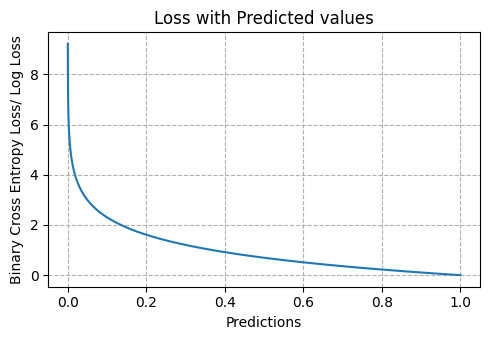

In [61]:
fig, ax1 = plt.subplots(1,1, figsize=(5, 3.5))

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_bin_ce = [bin_ce(target[i], pred[i]) for i in range(len(pred))]

# plot for binary cross entropy
ax1.plot(pred, loss_bin_ce)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Binary Cross Entropy Loss/ Log Loss')
ax1.set_title("Loss with Predicted values")

plt.grid(linestyle='--')
fig.tight_layout()
# fig.savefig()

In [63]:
error = target - pred
error

def mse_des_w(true, pred):
    loss = np.where(true==1, -(true-pred)**2*(1-(true-pred)), (true-pred)**2*(1-(true-pred)))
    return np.sum(loss)

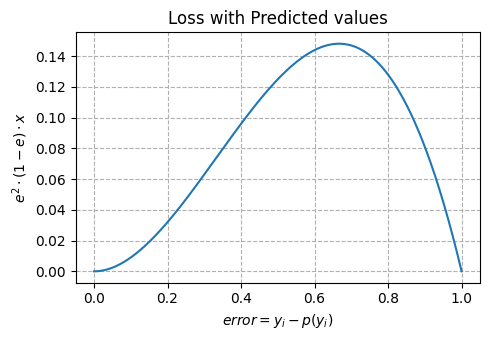

In [95]:

fig, ax1 = plt.subplots(1,1, figsize=(5, 3.5))

 

mse_des_weight = np.array([mse_des_w(target[i], pred[i]) for i in range(len(pred))] )
# plot for binary cross entropy
ax1.plot(error, -mse_des_weight )

ax1.set_xlabel(r'$error=y_i-p(y_i)$')
ax1.set_ylabel(r'$e^2\cdot (1-e)\cdot x $')
ax1.set_title("Loss with Predicted values")

plt.grid(linestyle='--')
fig.tight_layout()
# fig.savefig()

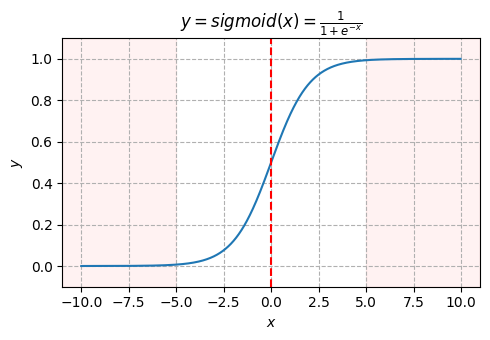

In [163]:
pred = np.arange(-10, 10, 0.02)
sigmoid_x = [1/(1+np.e**(-x))for x in pred]


fig, ax1 = plt.subplots(1, 1, figsize=(5, 3.5))
ax1.plot(np.arange(-10, 10, 0.02), sigmoid_x)

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$ y$')
ax1.set_title(r'$ y=sigmoid(x)=\frac{1}{1+e^{-x}} $')
rect = plt.Rectangle((5, -0.1 ), 5+1 , 1.2, fill=True, edgecolor='red', linewidth=1, alpha=0.05 ,color='r')
ax1.add_patch(rect)

rect = plt.Rectangle((-11, -0.1 ), 5+1 , 1.2, fill=True, edgecolor='red', linewidth=1, alpha=0.05 ,color='r')
ax1.add_patch(rect)


ax1.vlines([0,], -0.1 , 1.1, linestyles='dashed', colors='red') 

plt.xlim(-11,11)
plt.ylim(-0.1,1.1)


plt.grid(linestyle='--')
fig.tight_layout()

In [141]:
ax1??

In [127]:
??plt.Rectangle

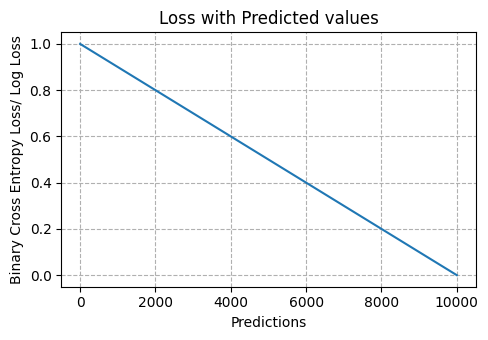

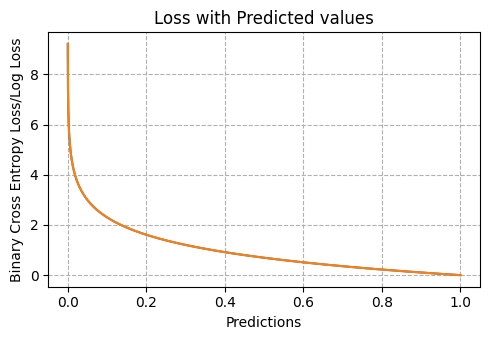

In [169]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3.5))


def nll(true, pred):
    loss = np.log(pred)
    return -np.sum(loss)


# calculating loss function for all predictions.
loss_nll = [nll(target[i], pred[i]) for i in range(len(pred))]

# plot for binary cross entropy
ax1.plot(pred, loss_bin_ce)
ax1.plot(pred, loss_nll)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Binary Cross Entropy Loss/Log Loss')
ax1.set_title("Loss with Predicted values")

plt.grid(linestyle='--')
fig.tight_layout()
# fig.savefig()

#### focal loss

In [212]:
def focal(true, pred, gamma):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: binary cross entropy loss
    """
    loss = np.where(true==1, (1-pred)**gamma*(np.log(pred)), pred**gamma*(np.log(1-pred)))
    return -np.sum(loss)

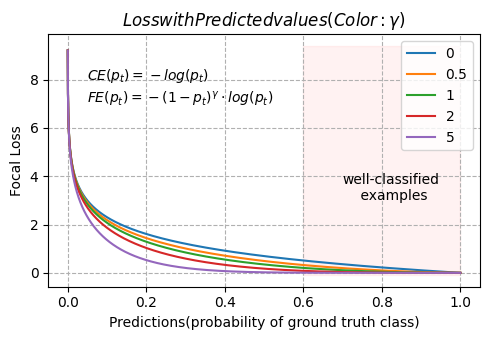

In [258]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3.5))

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
gammas = [0,  0.5, 1, 2, 5]
losses_focal = [[focal(target[i], pred[i], gamma) for i in range(len(pred))] for gamma in gammas]

losses_focal_0 = [focal(target[i], pred[i], gamma) for i in range(len(pred)) for gamma in [0]]

# plot for binary cross entropy

    
# ax1.plot(pred, losses_focal_0 , label = 0 , lw=4, alpha=0.5  )
for i in range(len(gammas)):
    ax1.plot(pred, losses_focal[i], label = gammas[i])
ax1.set_xlabel('Predictions(probability of ground truth class)')
ax1.set_ylabel('Focal Loss')
ax1.set_title(r"$Loss with Predicted values (Color: \gamma)$")
ax1.legend(loc =1  )

# make right and top lines invisible
# ax1.spines['top'].set_visible(False)    # Make the top axis line for a plot invisible
# ax1.spines['right'].set_visible(False) # Make the right axis line for a plot invisible
rect = plt.Rectangle((0.6, -0.1 ), 0.4  ,9.5    , fill=True, edgecolor='red', linewidth=1, alpha=0.05 ,color='r')
ax1.add_patch(rect)

plt.text(0.7    ,3 , 'well-classified\n    examples ',fontsize=10)
plt.text(0.05  , 8, r'$CE(p_t)=-log(p_t)$')#bbox=dict(facecolor='red', alpha=0.5)) 
plt.text(0.05  , 7, r'$FE(p_t)=-(1-p_t)^γ \cdot log(p_t)$')#bbox=dict(facecolor='red', alpha=0.5)) 
plt.grid(linestyle='--')
fig.tight_layout()

#### hinge

Hinge loss

In [171]:
def hinge(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = np.max((0, (1 - pred*true)))
    return np.sum(loss)

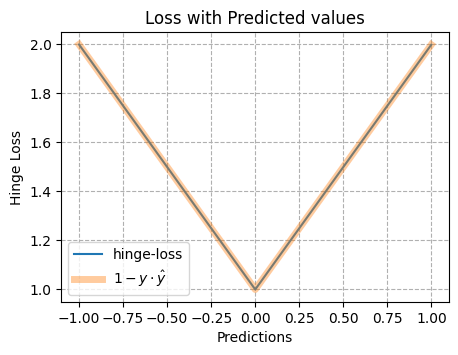

In [210]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3.5))

# array of same target value 10000 times
# considering prediction to be 1
target = np.array(list(np.repeat(1, 1000)) + list(np.repeat(-1, 1000)))
pred = np.arange(-1, 1, 0.001)  # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions.
loss_hinge = [hinge(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_hinge, label='hinge-loss')
ax1.plot(pred, 1-pred*target, label=r'$1-y\cdot \hat{y} $', alpha=0.4, lw=5)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Hinge Loss')
ax1.set_title("Loss with Predicted values")
plt.legend()

plt.grid(linestyle='--')
# fig.tight_layout()
# fig.savefig()

In [206]:
len(pred)

2000

In [187]:
r'$1-y \cdot y^$'

'$1-y \\cdot y^$'

Square loss

In [22]:
def sq_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = (1 - pred*true)**2
    return np.sum(loss)

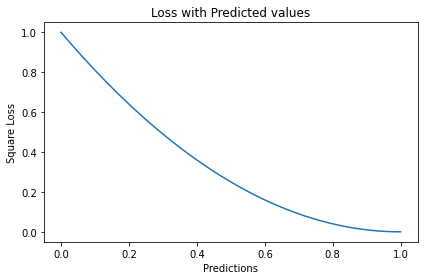

In [23]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_sq = [sq_loss(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_sq)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Square Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

Logistic loss

In [24]:
def log_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = np.log(1 + np.exp(-(pred*true)))/np.log(2)
    return np.sum(loss)

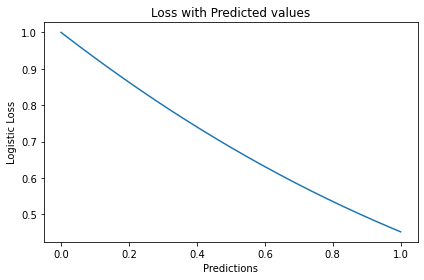

In [25]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_log_loss = [log_loss(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_log_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Logistic Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

Exponential loss

In [321]:
def expo(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: exponential loss
    """
    loss = np.exp(-(pred*true))
    return np.sum(loss)

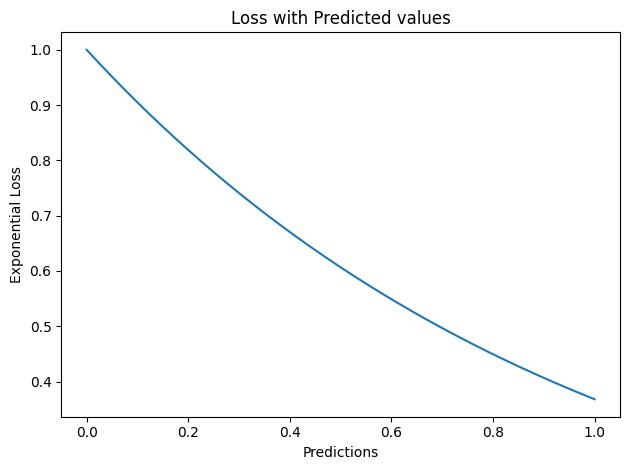

In [322]:
fig, ax1 = plt.subplots()

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_exp = [expo(target[i], pred[i]) for i in range(len(pred))]

# plot for exponential loss
ax1.plot(pred, loss_exp)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Exponential Loss')
ax1.set_title("Loss with Predicted values")
fig.tight_layout()

Kullback–Leibler divergence

In [33]:
def kld(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: KL divergence loss
    """
    loss = pred*(np.log(pred) - true)
    return np.sum(loss)

### Embedding loss (have 2 inputs and compare them)

* Hinge embedding criteria
* L1 Hinge embedding
* Cosine distance

### Miscelaneus losses

* Haversine distance
* Weighted average of muliple losses